# **EE214 Project 1: SVM**

This is the first project for EE214 Machine Learning Basics and Practices and consists of as follows:
* **Part 1. Data generations and imports**
* **Part 2 (70 pts). Soft margin SVM implementation and application**
* **Part 3 (30 pts). SVM with RBF kernel implementation and application**
* **Part 4 (Bonus). Multiclass classification with MNIST dataset**

## **Important**

* Your points for this project cannot exceed **100** points. **Part 4** is just to complement the points that you are deducted in **Parts 1~3** if so. In other words, The points from **Part 4** **DO NOT** carry over to anywhere else out of this project.
* You have to write some descriptions of codes and results for your points in each part. For required sections, we will make the **markdown** box to write in and inform you what to write. Check **ALL** steps (including **small** ones, i.e. **Step a-b** forms) which have points. We will provide how to write on **markdown** right below.
* Your **submission** must be on the KLMS and includes two formats:
    * **[STUDENT_ID]_project1.ipynb**, e.g., 20XXXXX1.ipynb
    * **[STUDENT_ID]_project1.pdf**

## **Basic markdown tutorial**
**Double click**, or click and press **enter** to edit markdown block. In google colab, there is a good feature that you can see the preview on the right side while you edit the markdown on the left side. You may refer to it.

For the end of some of the steps, there are markdown blocks like below. The blocks would look like **Block 1** and you have to write answers below **write below** line. When you submit, the block should look like **Block 2**.

You can just write there with plain text. For some basic markdown syntax, refer to [here](https://anys4udoc.readthedocs.io/en/latest/attach/doc-markdown.html#general-format). In addition to this, if you want to use the $LaTeX$-style mathematical expressions, you can simply write your mathematical expressions between two **dollar** (**\$**) symbols (**Shift + 4**) just as in the $TeX$ file. To make them in the new line, you can use two **double dollar** (**\$\$**) symbols.

##### Block 1

*********************************
Example question

---------- your answer ---------- <br>



------------------------------------------ \
*********************************

##### Block 2

*********************************
Example question

---------- your answer ---------- <br>

Example answer

------------------------------------------ \
*********************************

## Notice

All of the explanations below are the **simplified** explanations of **SVM** **without** the use of **dual** arguments. Some more parts other than **duals** are **omitted** for simplicity. Some explanations may differ from the explanations in class but they do not contradict.  

### **Introduction of support vector machine (SVM)**
Support vector machine (SVM) is one of the most important supervised learning methods before deep learning. It is basically a binary classification method, but we can also use it for multiclass classification (see below). <br>
Each point is given a label within $\{\pm 1\}$. We classify the points by using an affine function $f(\mathbf{x}):=\mathbf{x}^T \mathbf{w}+b$. The classification rule is simple; the predicted $\hat{y}=+1$ if $f(\mathbf{x})\geq 0$ and $\hat{y}=-1$ otherwise. <br>
For generalization, we introduce a margin-$y\cdot f(\mathbf{x})\geq 1$ instead of $y\cdot f(\mathbf{x})\geq 0$. Our goal is to maximize the size of the margin while the performance of the classification is great for the training set. <br>
Since the size of the margin is $\frac{1}{||\mathbf{w}||}$, equivalently we minimize $||\mathbf{w}||$. However, the derivative of $||\mathbf{w}||$ is complicated so we cannot optimize easily with the objective $||\mathbf{w}||$. Instead, use $\frac{1}{2}||\mathbf{w}||^2$, whose derivative is $\mathbf{w}$. <br>
First, we assume that every point is within the margin. (hard margin) <br>
Then, our optimization objective is as follows: $\min_{\mathbf{w},b} \frac{1}{2}||\mathbf{w}||^2: 1-y_i(\mathbf{x}_i^T \mathbf{w}+b)\leq 0 \: \: \forall i$. <br>
<a href="https://ibb.co/t24DpP8"><img src="https://i.ibb.co/5j6LhxB/img.jpg" alt="img" border="0" /></a>

However, this method is likely to be affected by outliers and may overfit. Also, in most cases, two parts of the dataset are not fully separable. See the above figure. We can see that the upper one can be classified by hard margin but the lower one cannot. Therefore, we allow some more relaxation, i.e. $1-y_i(\mathbf{x}_i^T \mathbf{w}+b)\leq \zeta_i$, where $\zeta_i\geq 0\:\: \forall i$. (soft margin) <br>
Our goal is to minimize $\frac{1}{2}||\mathbf{w}||^2$ and $\sum_i \zeta_i$ simultaneously. To do this, we sum them up with weights. <br>
 The objective is therefore as follows: $\min_{\mathbf{w},b} \frac{1}{2}||\mathbf{w}||+C\sum_{i=1}^N \zeta_i: 1-y_i(\mathbf{x}_i^T \mathbf{w}+b)\leq \zeta_i, \:\: \zeta_i\geq 0 \: \: \forall i$. <br>

# **Part 1**. Data generations and imports
* This part is to generate or import datasets used in **Part 2 & 3**.
* You have nothing to implement, but it would be helpful if you carefully observe the datasets and their visualizations. You may get some information from the provided links.

In [ ]:
## import modules ##
import numpy as np
import cvxpy as cp
from sklearn.datasets import make_blobs, load_breast_cancer, make_circles, fetch_openml # datasets used for classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##### Remark. Each dataset is generated or imported and is divided by train and test sets with portions 0.7 and 0.3, respectively. X is a 2D np.ndarray (or matrix) (feature_dimension) $\times$ (num_data_points) whose rows are feature vectors and Y is an 1D np.ndarray (or vector) which consists of labels, either +1 or -1. Note that all procedures are **deterministic**.

### **Dataset 1**
 Generated by **make_blobs** function in scikit-learn dataset package, feature dimension=2, linearly separable, label=$\{\pm 1\}$, 200 data points with 100 $+1$ labels and 100 $-1$ labels <br>
 See [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) for details

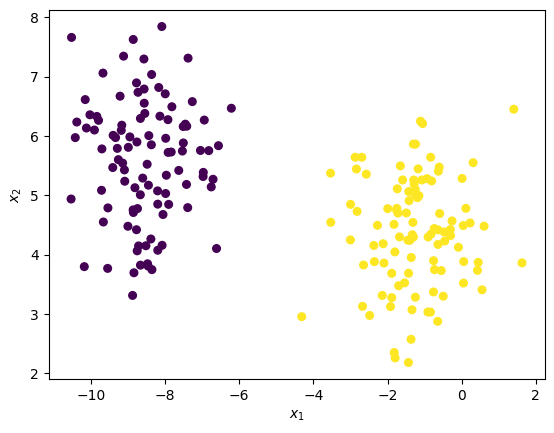

In [ ]:
# Generate synthetic data
n_samples = 200
n_features = 2
centers = 2
random_state = 7

X_1, y_1 = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=random_state)
y_1 = 2 * y_1 - 1 # to make label +1 and -1 instead of 0 and 1

# Split data into training and testing sets
test_size = 0.3
random_state_split = 7

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=test_size, random_state=random_state_split)

# Visualize the data
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, s=30)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### **Dataset 2**

**Breast cancer dataset** in scikit-learn dataset package, feature dimension=30, not linearly separable, label=$\{\pm 1\}$, 569 data points with 212 $+1$ labels and 357 $-1$ labels <br>
See [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) for details<br>
Below visualization is conducted with respect to the first two feature dimensions.

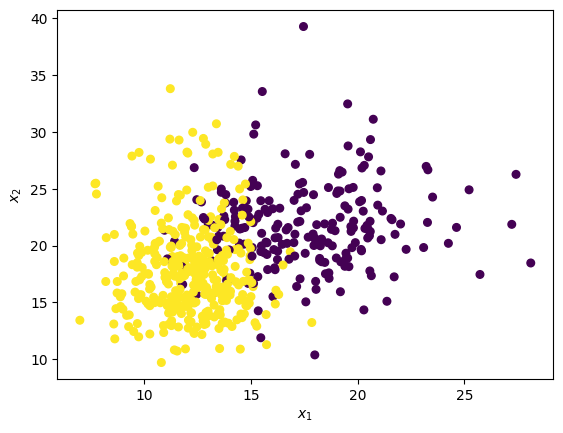

In [ ]:
# Load breast cancer dataset
X_2, y_2 = load_breast_cancer(return_X_y=True)
y_2 = 2 * y_2 - 1

# Split data into training and testing sets
test_size = 0.3
random_state_split = 7

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=test_size, random_state=random_state_split)

# Visualize the data
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, s=30)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### **Dataset 3**
Generated by **make_circles** function in scikit-learn dataset package, feature dimension=2, not linearly separable, label=$\{\pm 1\}$, 400 data points with 200 $+1$ labels and 200 $-1$ labels <br>
See [here](ttps://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) for details

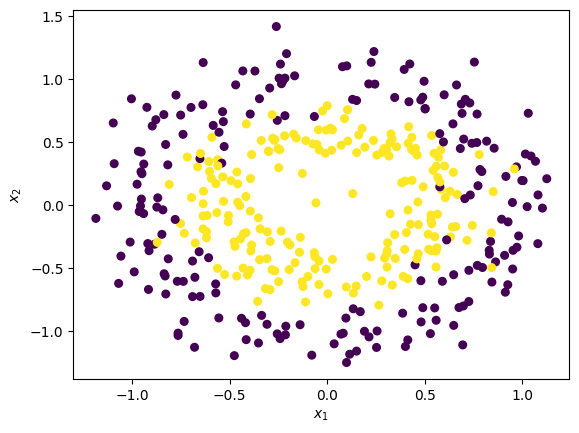

In [ ]:
# Generate synthetic circular data
n_samples = 400
random_state_data = 7
factor = 0.6
noise = 0.15

X_3, y_3 = make_circles(n_samples=n_samples, random_state=random_state_data, factor=factor, noise=noise)
y_3 = 2 * y_3 - 1

# Split data into training and testing sets
test_size = 0.3
random_state_split = 7

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=test_size, random_state=random_state_split)

# Visualize the data
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=30)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# **Part 2 (Total 70 pts)**. Soft margin SVM implementation and application
* Understand how to implement the simple SVM algorithm with stochastic descent (SGD) and evaluation metrics from scratch given formulas
* Apply such functions to the datasets above for SVM classification and evaluate

## **Step 1 (Total 35 pts)**. Implement SVM and evaluation metrics with **numpy** module

### **$\color{red}{\text{ToDo}}$**: Fill in the blanks with the code by referring to the following conditions, formulas, and hints below for all the **Steps 1-1 ~ 1-3.** Write your answer to all questions in markdown blocks at the end of **Steps 1-1 ~ 1-3.**. There is a tutorial for how to use markdown at the top of this document.

### **The property of some objects**

**X**: size **n $\times$ d** 2D array, where **n** is the number of data points and **d** is the number of feature dimensions. It is a vertical concatenation of data points. You can use **X[:, i]** to get a data point of index **i**. <br>
**y**: size **n** 1D array, which consists of actual labels of data points. The indices are paired to **X**, which means that the label of **X[i, :]** is **y[i]**. Although it is not explicitly defined whether **y** is a column or row vector in Python, you may think of it as a column vector for computation. <br>
**y_pred**: size **n** 1D array, which consists of the prediction of labels of **X**. Its indices are also paired to **X** and of course **y**.

### **Step 1-1 (7+3 pts)**. Implement **get_accuracy** function
**Problem 1(a)** (**7 pts**) complete **get_accuracy** function code block. <br>
You have to derive **acc**, which is the **percent accuracy**, by comparing label vector **y** (size n np.ndarray) to predicted label vector **y_pred**. The formula is (# i such that y[i]=y_pred[i])/n $\times$ 100 (%), where $0\leq i \leq n-1$.  <br>
* **y**: An 1D array which is a concatenation of labels (target)
* **y_pred**: An 1D array which predicts the labels
* **n**: Size of **y** and **y_pred** <br>
ex) if **y**=[1,1,-1,-1], **y_pred**==[-1,1,-1,1], then **acc**=(# i such that y[i]=y_pred[i])/n $\times$ 100=2/4 $\times$ 100=50. <br>
Note. **acc** should have type **float** without %

In [ ]:
def get_accuracy(y,y_pred):
    ########## implement here ##########
    sum = 0
    n = np.size(y)
    for i in range(n):
      if y[i] == y_pred[i]:
        sum += 1

    acc = sum/n*100
    ####################################
    return acc

In [ ]:
# Test cases
test_case_1 = get_accuracy(np.array([1, 1, 1]), np.array([1, 1, 1]))
test_case_2 = get_accuracy(np.array([1, 1, 1, 1, 1, 1]), np.array([-1, -1, -1, -1, -1, -1]))
test_case_3 = get_accuracy(y_1[:16], y_1[16:32])

# Print test case results rounded to two decimal places
print(f'Test Case 1: {test_case_1:.2f} %')
print(f'Test Case 2: {test_case_2:.2f} %')
print(f'Test Case 3: {test_case_3:.2f} %')

Test Case 1: 100.00 %
Test Case 2: 0.00 %
Test Case 3: 56.25 %


*********************************
**Problem 1(b)** (**3 pts**) Express **acc** in terms of **e**, and just write the answer without any proof. For some documents, they use **error rate** instead of **percent accuracy**. An **error rate**, **e** is defined as **e**=(# i such that y[i] $\neq $ y_pred[i])/n. Express **acc** in terms of **e**.

---------- your answer ---------- <br>
acc = (1-e)*100 (%)


------------------------------------------ \
*********************************

### **Step 1-2 (7+3 pts)**. Implement **make_confusion_matrix** function
**Problem 1(c)** (**7 pts**) complete **make_confusion_matrix** function code block. <br>
You have to derive the confusion matrix **M**, which has size **m $\times$ m** and (i,j)-th entry is the number of data points such that **y=i**, **y_pred=j** if you count the matrix indices from **0**, not 1 ($0\leq i,j\leq m-1$). <br>
For the $m=2$ case, the label is $\{\pm 1\}$ and already implemented (**label +1 is considered as 1 and label -1 is considered as 0**). <br>
What you have to implement is the case that $m\geq 3$, where the label is $\{0,1,\cdots,m-1\}$. We assume that each entry of **y** and **y_pred** has type **int**.

In [ ]:
def make_confusion_matrix(y, y_pred, m=2):
    n = np.size(y) # number of iterations

    # Cover the case that y and y_pred have string dtype
    y=y.astype(int)
    y_pred=y_pred.astype(int)

    if m == 2:
        M = np.zeros((2, 2))
        for i in range(n):
            M[int((y[i] + 1) / 2), int((y_pred[i] + 1) / 2)] += 1
    else:
        ########## implement here ##########
        M = np.zeros((m, m))
        for i in range(n):
          M[y[i], y_pred[i]] += 1
        ####################################
    return M.astype(int) # make the matrix have integer entries

In [ ]:
# Test cases
test_case_1 = make_confusion_matrix(np.array([1, 1, 1]), np.array([1, 1, -1]))
test_case_2 = make_confusion_matrix(np.array([0, 0, 2, 2, 3, 3, 1, 2]), np.array([1, 1, 2, 2, 0, 3, 3, 0]), m=4)
test_case_3 = make_confusion_matrix(y_1[:100], y_1[100:])

# Print test case results
print('Test Case 1:\n', test_case_1)
print('Test Case 2:\n', test_case_2)
print('Test Case 3:\n', test_case_3)

Test Case 1:
 [[0 0]
 [1 2]]
Test Case 2:
 [[0 2 0 0]
 [0 0 0 1]
 [1 0 2 0]
 [1 0 0 1]]
Test Case 3:
 [[24 26]
 [26 24]]


*********************************
**Problem 1(d)** (**3 pts**) What entries of the **confusion matrix** correspond to **right** and **wrong** predictions, respectively?

---------- your answer ---------- <br>
Diagonal entries will be the right predictions\
The rest of the entries will be the wrong predictions\
------------------------------------------ \

*********************************

### **Step 1-3 (11+4pts)**. Implement SVM algorithm with SGD
**Problem 1(e)** (**11 pts**) Read the below explanation of the unconstrained version of SVM and implement `SVM_hinge`, which optimizes such a version of SVM with SGD. <br>

### **A brief explanation of the SVM algorithm with stochastic gradient descent (SGD)**

Although the objective is constrained so that we cannot use gradient descent, we may change it slightly to make it unconstrained: <br>
$\min_{\mathbf{w},b} \frac{1}{2}||\mathbf{w}||^2+C\sum_i (1-y_i(\mathbf{x}_i^T \mathbf{w}+b))^+$, where $x^+:=\max\{0,x\}$ is a positive part. <br>
Then, $\nabla_{\mathbf{w}}(\frac{1}{2}||\mathbf{w}||^2+C\sum_i (1-y_i(\mathbf{x}_i^T \mathbf{w}+b))^+)=\mathbf{w}-C\sum_i \mathbf{1}_{\{1-y_i(\mathbf{x}_i^T \mathbf{w}+b)\geq 0\}} y_i\mathbf{x}_i$ and <br>
$\nabla_b(\frac{1}{2}||\mathbf{w}||^2+C\sum_i (1-y_i(\mathbf{x}_i^T \mathbf{w}+b))^+)=-C\sum_i\mathbf{1}_{\{1-y_i(\mathbf{x}_i^T \mathbf{w}+b)\geq 0\}} y_i$. <br>
We use stochastic gradient descent. For each update, we sample $i$. We also divide by $C$ in descent term for stability. <br>
The update rule is $\mathbf{w}\leftarrow \mathbf{w}-\frac{1}{C}\alpha\nabla_{\mathbf{w}}$, $b\leftarrow b-\frac{1}{C}\alpha \nabla_b$.

### **The property of some objects**

**w**: An 1D array whose size is as same as the size of each data point x_i=X[i, :] <br>
**b**: A scalar <br>
**j**: An 1D array whose size is num_iter and each element is sampled uniformly from $\{0,1,\cdots, d-1\}$, where **d** is the number of feature dimensions

You have to call **j[i]** for each i for where you implement. You have to update **w** and **b** as the decision function is positive when the decision function is exactly zero. In other words, if you use **if-else statement**, you have to include the case that the decision function equals zero to the case that the decision function is positive. Also, if you update both **w** and **b**, you should update **w** first.

Hint: You may use **np.dot** function for $\mathbf{x}_i^T \mathbf{w}$.

In [ ]:
def SVM_hinge(X, y, C=100, num_iter=1000000, alpha=1e-3):
    w = np.zeros_like(X[0, :])
    b = 0

    # A sequence of random integers to choose indices
    j = np.random.randint(X.shape[0], size=num_iter)

    for i in range(num_iter):
        ########## implement here ##########
        xi = X[j[i]]
        yi = y[j[i]]

        decision = 1-yi*((np.dot(w, xi))+b)
        if decision>=0:
          w -= (alpha*(w-C*yi*xi))/C
          b += alpha*C*yi
        ####################################
    return w, b

*********************************
**Problem 1(f)** (**2+1+1 pts**) Write your **conjecture**. **No deduction** for **wrong** statements but **no points** will be given if you write **nothing or too insincere answers**. <br>
1. What will happen if we **increase** the value of **C**?
2. What will happen if we **decrease** the value of **num_iter**?
3. Some known codes do not use **b**. what can be expected for such codes compared to this?

---------- your answer ---------- <br>
1. C는 gradient에 곱해진 상수로 C 값이 커지면 더 빠르게 training dataset에 대해 optimization 될 수 있다. trainging dataset에만 정확도를 높이는 만큼 overfitting이 일어날 확률이
 증가할 것이다.
2. 반복 횟수인 num_iter를 줄이면 학습이 충분하게 일어나지 않아 원하는 모델을 얻지 못할 수 있다.
3. bias는 data를 나누는 직선을 이동시키는 역할을 하는데 이를 사용하지 않는 것은 직선이 원점을 지난다는 것이다. 이는 data가 원점을 중심으로 분포되어 있는 경우에 적합하다.
------------------------------------------ \
*********************************

## **Step 2 (Total 35 pts)**. Apply the SVM algorithm to prepared three datasets above

## **$\color{red}{\text{ToDo}}$**: Fill in the blanks in **Step 2-1.** Write your answer to all questions in markdown blocks at the end of **Steps 2-2 ~ 2-6.** For each of **Steps 2-2 ~ 2-6**, we made the blank code block that you can analyze the codes by additionally writing your own codes there.

### **Step 2-1 (15 pts)**. Define a function that performs SVM and outputs some results for each dataset

**Problem 2(a)** (**7+8 pts**) The below function is **run_step_2**, which is a function that **performs SVM**, derives **accuracy and confusion matrix** of **training** and **test** set, **prints** them, and **plots** data points, decision boundary, and two hyperplanes which is a collection of all $\mathbf{x}$ with $f(\mathbf{x})=\pm 1$.

For **(1)**, derive **y_train_pred** and **y_test_pred** which are the label estimates with respect to **y_train** and **y_test**, respectively. Use **X_train** (or **X_test**), **w**, and **b** for prediction. <br>
Hint: You may think **w** as a column vector and $X_{\text{train}}$ and $X_{\text{test}}$ as matrices. **A@b** results in matrix-vector multiplication. Check the descriptions of SVM at the top of this file. You can use **np.sign** to check the sign of each element in an array and output +1 for positive entries and -1 for negative entries.

For **(2)**, derive **acc_train**, **acc_test**, **M_train**, and **M_test**. Use **get_accuracy** and **make_confusion_matrix** function for implementation. You do not need to use **m** for the latter function because we have to use **m=2** which is the default value. You can easily match what they are by checking the **# Print results"** part, which is the code right below.

In [ ]:
def run_step_2(dataset_number, no_print=False, no_plot=False, use_cvxpy=False, cvxpy_C=None):
    # Dataset 1
    if dataset_number == '1':
        X_train, X_test, y_train, y_test = X_1_train, X_1_test, y_1_train, y_1_test
    # Dataset 2 with first two feature vector dimensions
    elif dataset_number == '2-1':
        X_train, X_test, y_train, y_test = X_2_train[:, :2], X_2_test[:, :2], y_2_train, y_2_test
    # Dataset 2 with full feature vector dimensions
    elif dataset_number == '2-2':
        X_train, X_test, y_train, y_test = X_2_train, X_2_test, y_2_train, y_2_test
    # Dataset 3
    elif dataset_number == '3':
        X_train, X_test, y_train, y_test = X_3_train, X_3_test, y_3_train, y_3_test

    # Start from derivation of w and b and fitting
    if use_cvxpy:
        w, b = SVM_cvx(X_train, y_train, C=cvxpy_C) # defined in Step 2-6; see below
    else:
        w, b = SVM_hinge(X_train, y_train, C=1, num_iter=1000000, alpha=1e-4) # derive w and b

    # Predict labels
    ########## implement here (1) ##########
    y_train_pred = np.sign(X_train@w+b)
    y_test_pred = np.sign(X_test@w+b)
    ########################################

    # Calculate accuracy and confusion matrix
    ########## implement here (2) ##########
    acc_train = get_accuracy(y_train, y_train_pred)
    acc_test = get_accuracy(y_test, y_test_pred)
    M_train = make_confusion_matrix(y_train, y_train_pred)
    M_test = make_confusion_matrix(y_test, y_test_pred)
    #########################################

    # Print results
    if not no_print:
        print(f"The value of w is {np.array2string(w, precision=4, floatmode='fixed')}")
        print(f"The value of b is {b:.4f}")
        print(f'Accuracy of SVM for the training set is {acc_train:.2f} %')
        print(f'Accuracy of SVM for the test set is {acc_test:.2f} %')
        print('Confusion matrices of SVM for the training and test sets are')
        print(M_train)
        print(M_test)

    # Plot the data points and decision boundaries
    if not no_plot:
        plt.figure(figsize=(8, 8), constrained_layout=True)
        ax = plt.gca()
        ax.set_aspect('equal')
        plt.subplot(1, 2, 1)

        # Training set plot on the left side
        plt.title('Classification Result of Training Set')
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=10)
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        x = X_train[:, 0]
        plt.plot(x, -w[0] / w[1] * x - b / w[1], color='b')
        plt.plot(x, -w[0] / w[1] * x - b / w[1] - 1 / w[1], color='r')
        plt.plot(x, -w[0] / w[1] * x - b / w[1] + 1 / w[1], color='r')

        # Test set plot on the right side
        plt.subplot(1, 2, 2)
        plt.title('Classification Result of Test Set')
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10)
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        x = X_test[:, 0]
        plt.plot(x, -w[0] / w[1] * x - b / w[1], color='b')
        plt.plot(x, -w[0] / w[1] * x - b / w[1] - 1 / w[1], color='r')
        plt.plot(x, -w[0] / w[1] * x - b / w[1] + 1 / w[1], color='r')

        plt.show()

### **Step 2-2 (3 pts)**. Apply our SVM algorithm to **Dataset 1**
The below code applies **run_step_2** to **Dataset 1**, **with** both prints and plots. See **Step 2-1** for details.

The value of w is [0.5238 0.0203]
The value of b is 2.3887
Accuracy of SVM for the training set is 100.00 %
Accuracy of SVM for the test set is 100.00 %
Confusion matrices of SVM for the training and test sets are
[[69  0]
 [ 0 71]]
[[31  0]
 [ 0 29]]


<ipython-input-59-c8c07a68e2e4>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


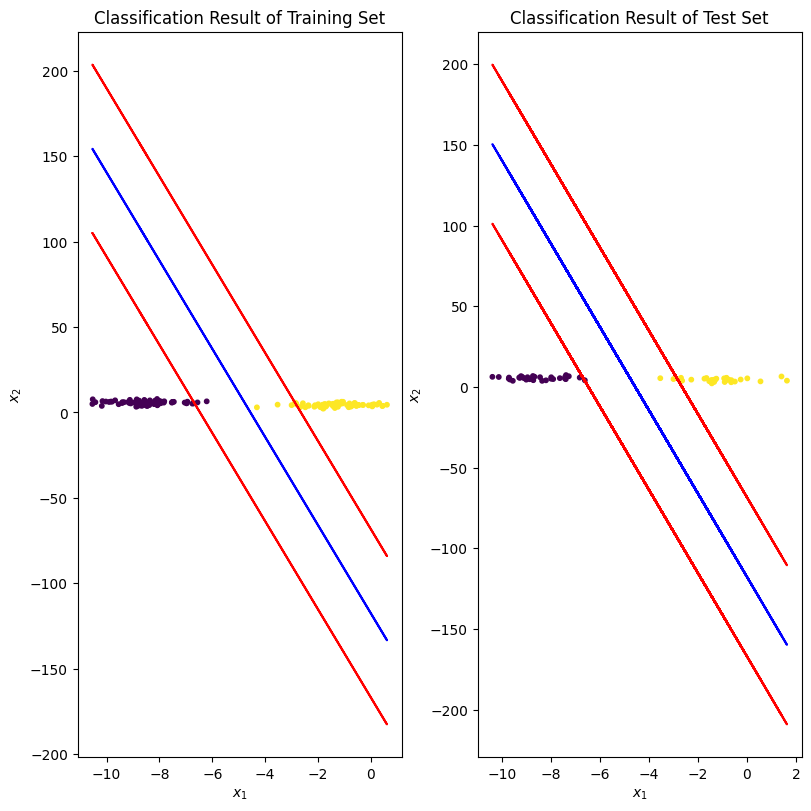

In [ ]:
run_step_2('1')

In [ ]:
########## (Optional) you may implement your code here if you want ##########

#############################################################################

********************************
**Problem 2(b)** (**3 pts**) If you implemented the above code correctly, **percent accuracy** of both **training** and **test** set would be both **100%**. This is of course the result of the **hard margin SVM**, too. Then, what is the main difference between the **soft margin SVM (this)** and **hard margin SVM** applied to **Dataset 1** according to the **plot**?

---------- your answer ---------- <br>
soft margin의 경우 일정 오차 범위를 허용하기 때문에 위 그래프의 파란선처럼 완벽하게 분리되지 않는다. 파란선 주변으로 제대로 분리되지 않은 점들이 존재할 것이다.
반면 hard margin의 경우 모든 데이터를 오차 없이 정확하게 분류한다. 즉, data를 정확하게 분류하기 힘들 경우 어느 정도의 오차를 허용해 soft margin을 이용하는 것이 적합하다. \
------------------------------------------ \
********************************

### **Step 2-3 (3 pts)**. Apply our SVM algorithm to **Dataset 2** with **first two** dimensions
The below code applies **run_step_2** to **Dataset 2** with **first two** dimensions, **with** both prints and plots. See **Step 2-1** for details.

The value of w is [-0.3097 -0.0429]
The value of b is 5.7217
Accuracy of SVM for the training set is 87.19 %
Accuracy of SVM for the test set is 90.06 %
Confusion matrices of SVM for the training and test sets are
[[109  48]
 [  3 238]]
[[ 38  17]
 [  0 116]]


<ipython-input-59-c8c07a68e2e4>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


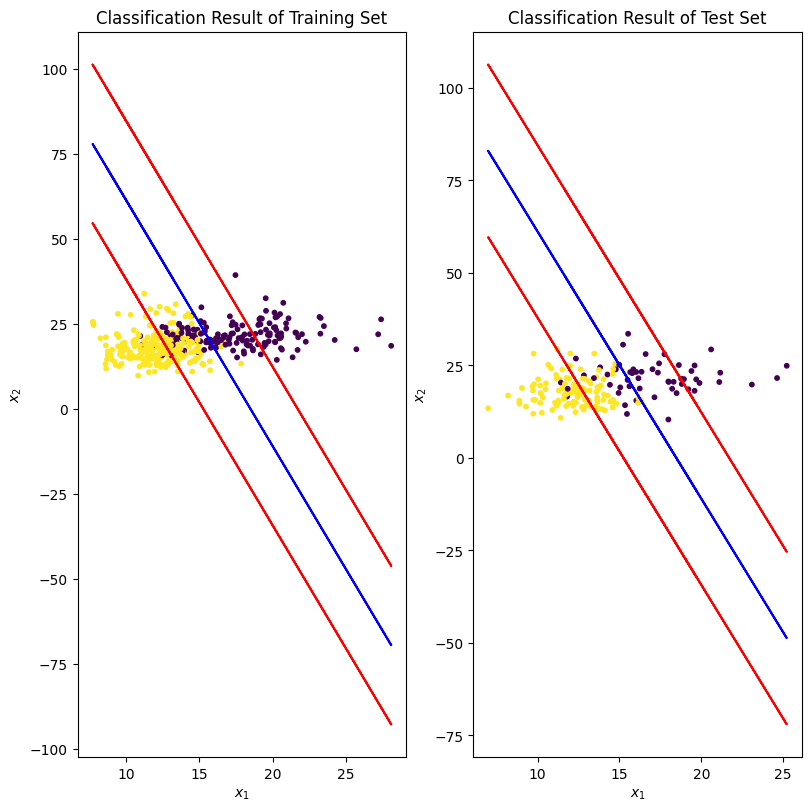

In [ ]:
run_step_2('2-1')

In [ ]:
########## (Optional) you may implement your code here if you want ##########

#############################################################################

*********************************
**Problem 2(c)** (**3 pts**) Some of the known implementations of SVM **from scratch** does **not** use **b**. For this case, what would happen according to the **plot**?

---------- your answer ---------- <br>
b를 사용하지 않으면 경계(그래프의 파란선)이 원점을 지나게 되므로 data가 원점 주변에 없다면 dataset에 대한 적합하지 않은 경계선이 된다. 따라서 accuracy가 매우 낮아진다.


------------------------------------------ \

*********************************

### **Step 2-4 (5 pts)**. Apply our SVM algorithm to **Dataset 2** with **full feature dimensions**
The below code applies **run_step_2** to **Dataset 2** with **full feature dimensions**, **with** prints but **without** plots. See **Step 2-1** for details.

In [ ]:
run_step_2('2-2', no_plot=True) # plot for first two dimension has less meanings

The value of w is [ 5.4550e-01 -1.0473e-01  2.3576e+00  5.5932e-01 -1.0526e-03 -2.6332e-02
 -4.3240e-02 -1.7718e-02 -6.4050e-04  1.0471e-03  8.0509e-03  2.8486e-03
 -9.7717e-02 -8.0987e-01 -4.0344e-04 -7.0814e-03 -9.4750e-03 -2.0733e-03
 -1.1243e-03 -5.7829e-04  5.7927e-01 -4.9474e-01  1.4893e+00 -8.5592e-01
 -5.7513e-03 -9.2170e-02 -1.2233e-01 -3.2517e-02 -1.1851e-02 -5.6082e-03]
The value of b is 0.9538
Accuracy of SVM for the training set is 92.21 %
Accuracy of SVM for the test set is 92.98 %
Confusion matrices of SVM for the training and test sets are
[[134  23]
 [  8 233]]
[[ 44  11]
 [  1 115]]


In [ ]:
########## (Optional) you may implement your code here if you want ##########

#############################################################################

*********************************
**Problem 2(d)** (**3+2 pts**) Run the above code **repeatedly** until the accuracy values of both training and test sets get lower than **75%** for both training and test sets. Compare **w**, **b**, and confusion matrices when such a case happens and when the accuracy values are **normal** (near **90%**). By observing such results, answer the following questions:
1. How different are they other than **accuracy values** themselves?
2. Why do you think such an accuracy drop happens? For this question, no **deduction** for **wrong** answers but write **sincerely** to get full points.

---------- your answer ---------- <br>
1. w와 b의 차이로 인해 accuracy가 변화하였다. accuracy가 낮은 경우 confusion matrix은 대각 이외의 성분의 값들이 normal인 경우보다 더 크게 나왔다. 이는 잘못된 예측을 한 경우가 많음을 의미한다.
2. data set 분포의 complexity에 비해 경계선이 너무 단순해 underfitting이 발생해서 정확도가 떨어졌을 수도 있다고 생각한다. \
 추가로 num_iter, c값이 해당 모델의 학습에 영향을 주기 때문에 정확도에 영향을 줄 수 있다고 생각한다.

------------------------------------------ \

*********************************

### **Step 2-5 (3 pts)**. Apply our SVM algorithm to **Dataset 3**
The below code applies **run_step_2** to **Dataset 3**, **with** both prints and plots. See **Step 2-1** for details.

The value of w is [ 0.0061 -0.0118]
The value of b is 0.9928
Accuracy of SVM for the training set is 51.79 %
Accuracy of SVM for the test set is 45.83 %
Confusion matrices of SVM for the training and test sets are
[[  0 135]
 [  0 145]]
[[ 0 65]
 [ 0 55]]


<ipython-input-59-c8c07a68e2e4>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


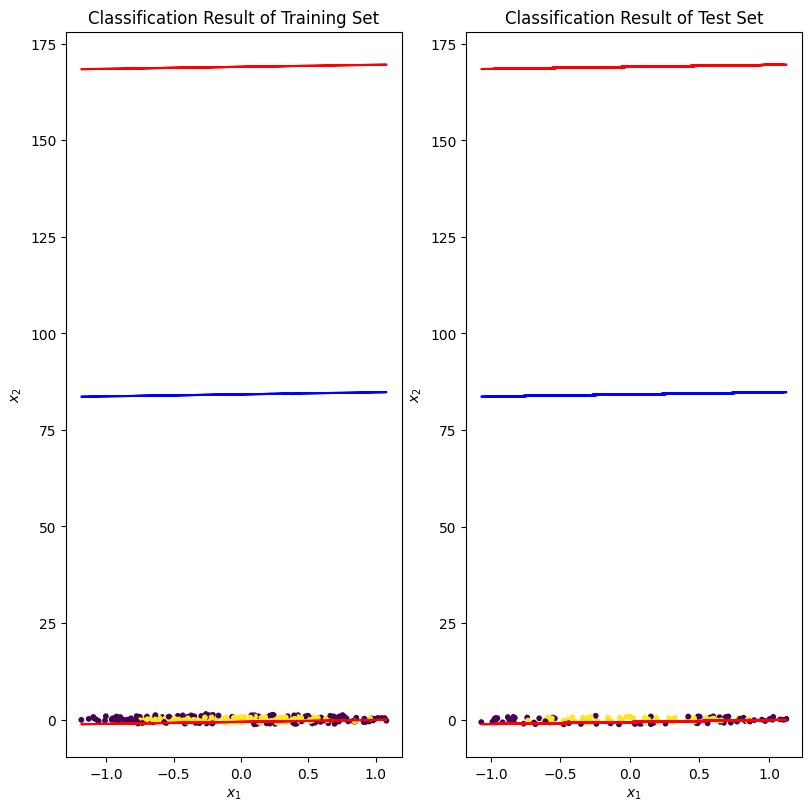

In [ ]:
run_step_2('3')

In [ ]:
########## (Optional) you may implement your code here if you want ##########

#############################################################################

*********************************
**Problem 2(e)** (**3 pts**) Did SVM classifier **well-classified** two labels? If not, what happened according to **confusion matrices** and **plots**? Note that the **first** column or row corresponds to label **-1** and **second** column or row corresponds **+1**.

---------- your answer ---------- <br>
잘 분류되지 않았다. \
data가 원형으로 분포되어 선형으로 분류할 수 없게 되어 있다. confusion matrix의 first column의 원소가 모두 0으로 나왔다. 즉, label -1로 분류된 것은 전혀 없고 모두 label 1로 분류를 한것이다. 이는 그래프를 통해서도 확인할 수 있는데 label 1에 해당하는 빨간 직선 한개만 data위에 그려져있다.


------------------------------------------ \

*********************************

### **Step 2-6 (6 pts)**. Apply SVM with **CVXPY** solver
Instead of using SGD from scratch, we can **directly** input the objectives and constraints. There are many available **solvers**, and we use those with **CVXPY**, one of the most famous Python modules which supports **convex optimization**, where the SVM problem is included. <br>
Run **Code 1** ahead and then run the other codes. <br>
**Code 1** defines the function that performs (soft margin) SVM with **CVXPY** solver. Then it will be applied with **run_step_2** in **Step 2-1**.

In [ ]:
# Code 1. define SVM with CVXPY solver
def SVM_cvx(X,y,C):

    # Optimization variables
    w = cp.Variable(X.shape[1])
    b = cp.Variable()
    zeta = cp.Variable(X.shape[0])

    # Objective function
    obj = cp.Minimize(0.5 * cp.sum_squares(w) + C * cp.sum(zeta))

    # Constraints
    constraints = []
    for i in range(X.shape[0]):
        constraints += [y[i] * (w @ X[i, :] + b) >= 1 - zeta[i]]
        constraints += [zeta[i] >= 0]

    prob = cp.Problem(obj, constraints)
    prob.solve(solver='ECOS_BB')  # Use a specific solver to handle complex problems

    return w.value, b.value

**Codes 2 ~ 4** apply SVM with CVXPY with different **C** values to **Dataset 2** with full feature dimensions. See **accuracy** values and **decision matrices** carefully. You **do not** have to repeatedly run as in **Steps 2-4 & 2-5** because the result is almost **deterministic**.

In [ ]:
# Code 2
run_step_2('2-2', no_plot=True, use_cvxpy=True, cvxpy_C=1)

The value of w is [ 1.2079 -0.0356 -0.1323  0.0081 -0.2722 -0.2535 -0.5348 -0.3906 -0.3331
 -0.0346  0.0153  0.6592  0.5798 -0.0539 -0.0386  0.0966  0.0476 -0.0247
 -0.0414  0.0222  0.2944 -0.1349 -0.1297 -0.0083 -0.5426 -0.4623 -1.0239
 -0.5750 -0.5782 -0.0841]
The value of b is 10.8326
Accuracy of SVM for the training set is 96.73 %
Accuracy of SVM for the test set is 95.32 %
Confusion matrices of SVM for the training and test sets are
[[149   8]
 [  5 236]]
[[ 48   7]
 [  1 115]]


In [ ]:
# Code 3
run_step_2('2-2', no_plot=True, use_cvxpy=True, cvxpy_C=1000)

The value of w is [-3.1964e+00 -2.4271e-01  3.9010e-01  1.3845e-02  1.7718e+00 -6.6231e+00
 -1.4344e+01 -3.6072e+01  6.9316e+00 -3.9826e+00 -1.7042e+01 -3.1803e-01
  6.4315e-01  7.4312e-02 -2.1741e+00  1.2216e+01  3.7543e+01 -4.2705e+00
  5.5916e-02  2.0249e+00  2.1977e+00  1.3743e-02 -8.6403e-02 -2.8157e-02
 -1.1752e+01  9.1073e+00 -6.5962e+00 -2.5077e+01 -1.6325e+01 -1.1471e+01]
The value of b is 14.9499
Accuracy of SVM for the training set is 99.25 %
Accuracy of SVM for the test set is 97.08 %
Confusion matrices of SVM for the training and test sets are
[[154   3]
 [  0 241]]
[[ 50   5]
 [  0 116]]


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
# Code 4
run_step_2('2-2', no_plot=True, use_cvxpy=True, cvxpy_C=1000000)

The value of w is [ 1.8925e+01 -4.5312e-01 -1.9514e+00  5.3591e-02  1.0619e+02  3.1738e+02
  4.6125e+01 -7.0544e+02  1.0365e+02 -2.0800e+02 -5.8134e+01 -9.7107e+00
  4.0369e+00  1.5717e-02  1.4746e+02 -7.9435e+01  2.0818e+02 -1.5869e+02
  3.2331e+02  1.3500e+02  5.0623e+00 -1.4437e-01 -1.0021e+00 -9.5006e-02
 -7.4314e+01  7.1324e+01 -6.2169e+01 -1.1109e+02 -1.2443e+02 -3.8604e+02]
The value of b is 72.4514
Accuracy of SVM for the training set is 100.00 %
Accuracy of SVM for the test set is 94.74 %
Confusion matrices of SVM for the training and test sets are
[[157   0]
 [  0 241]]
[[ 49   6]
 [  3 113]]


**Code 5** applies SVM with CVXPY to **Dataset 3**.

The value of w is [ 0.6124 -0.8926]
The value of b is 0.3684
Accuracy of SVM for the training set is 59.29 %
Accuracy of SVM for the test set is 49.17 %
Confusion matrices of SVM for the training and test sets are
[[ 59  76]
 [ 38 107]]
[[18 47]
 [14 41]]


<ipython-input-59-c8c07a68e2e4>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


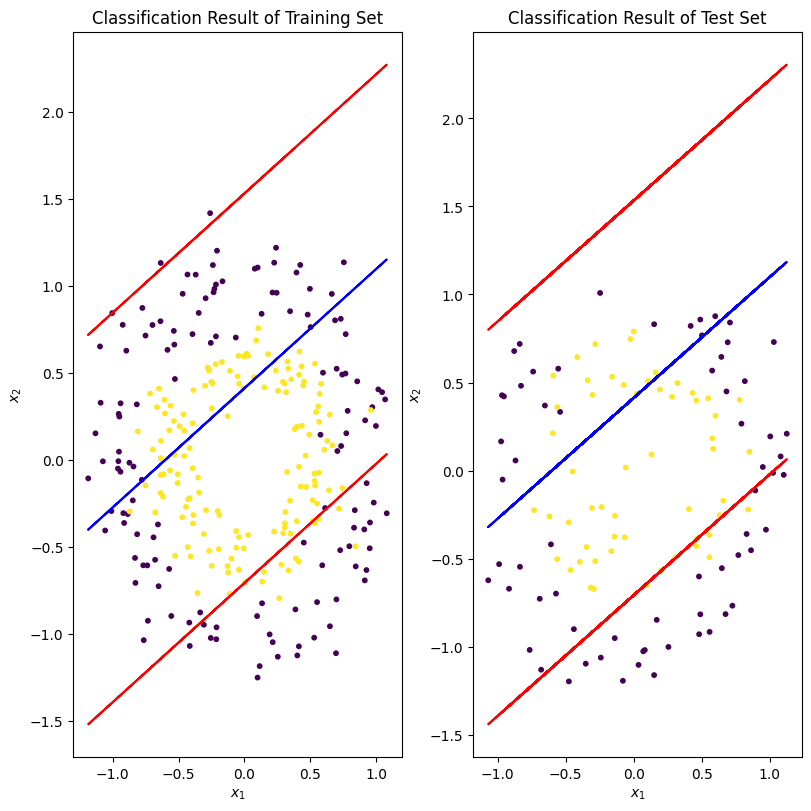

In [ ]:
# Code 5
run_step_2('3', use_cvxpy=True, cvxpy_C=1000)

*********************************
**Problem 2(f)** (**1+3+2 pts**)
1. For **Code 2**, it uses the same **C** values with **Step 2-4**. Which one had the better result?
2. For **Codes 3 & 4**, which apply SVM to **Dataset 2** with different values of **C**, what do you think is the better one and why? Explain with both **training** and **test** set **accuracy** and the word **"overfit"**.
3. Did SVM in **Code 5** classified well? Nevertheless, what is the difference between **Code 5** and **Step 2-5**?  

---------- your answer ---------- <br>
1. code 2가 더 높은 accuracy를 보여 나은 결과를 나타낸다. \
2. training set accuracy는 code4가 더 높고 test set accuracy는 code3이 더 높다. test set accuracy가 더 높은 code3이 더 낫다고 생각한다. code4의 경우 training set에 대해서만 accuracy가 높은 것으로 보아 overfitting이 발생해 training set에만 정확하게 학습한 결과이다. 따라서 새로운 data set인 test set에 대해 accuracy가 낮아지기 때문에 code3이 더 나은 결과를 나타낸다.
3. step2-5보다 더 나은 분류를 하지만 여전히 제대로 된 분류는 나오지 않았다. CVXPY solver를 통해 linear로 분류할 수 없는 복잡한 data에 대해 code5는 2-5보다 수치상으로 조금 더 발전시킨 결과를 얻었다

------------------------------------------ \

*********************************

# **Part 3 (Total 30 pts)** SVM with RBF kernel implementation and application
* Understand the basic concepts of kernel SVM and RBF kernel by the documentation below
* Implement and observe the impact of hyperparameters while using the scikit-learn package

Before you proceed, read along the below description of **kernel SVM** and **RBF kernel** to understand those things.

### **A brief explanation of kernel SVM and RBF kernel**

The SVM classifiers that we have seen above are **linear** SVM solvers in the sense that the decision function is **affine**, which can be informally said to be linear. <br>
This type of SVM classifier performs the classification quite well for some datasets such as **Datasets 1 and 2**, but in general, they do not, for example, **Dataset 3**. This is mostly because there are no possible linear boundaries to (possibly softly) separate the data points with different labels. <br>
To handle this, we use **transformation** $\mathbf{x}\mapsto \phi(\mathbf{x})$, where $\phi(\mathbf{x})$ can be classified by (linear) SVM. For this case, $f(\mathbf{x})=\phi(\mathbf{x})^T\mathbf{w}+b$. <br>
Also, we can utilize a highly useful scheme, a **kernel trick**, by using the following **Theorem**: <br>
<br>
********
**Theorem** <br>
For $\mathbf{w}$ in soft-margin SVM, we can express $\mathbf{w}$ with **linear combination** of $\mathbf{x}_i$'s, i.e. $\mathbf{w}=\sum_i a_i \mathbf{x}_i$ for some $a_i\in \mathbb{R}$.
********
<br>

By this, we can express $f(\mathbf{x})$ as $f(\mathbf{x})=\sum_i a_i\phi(\mathbf{x})^T \phi(\mathbf{x}_i)+b$. We define a kernel $K(\mathbf{x},\mathbf{x}_i):=\phi(\mathbf{x})^T\phi(\mathbf{x}_i)$. Then we rewrite $f(\mathbf{x})$ as $f(\mathbf{x})=\sum_i a_i K(\mathbf{x},\mathbf{x}_i)+b$. <br>
Such kernel is useful because of not only its simple expression but the property that we do not have to know the explicit form of $\phi$. The latter property gives **richer function space** for the kernel, and one prominent example is the **Radial basis function (RBF) kernel**. <br>
**RBF kernel** is a normalized version of a density function of **isotropic Gaussian function** with covariance matrix $\Sigma=\sigma^2 I$, i.e. $K(\mathbf{x},\mathbf{x}_i)=\exp(-\frac{||\mathbf{x}-\mathbf{x}_i||^2}{2\sigma^2})$. For convenience, we let $\gamma:=\frac{1}{2\sigma^2}$ so that $K(\mathbf{x},\mathbf{x}_i)=\exp(-\gamma||\mathbf{x}-\mathbf{x}_i|^2)$. This kernel is known to perform the best in most cases, and **we will use this easily by scikit-learn package**. We cannot use the **SGD approach**. We can use CVXPY but it is much slower than using the **scikit-learn** package. <br>
For implementation with the **scikit-learn** package, please read http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for details.

## **Step 1 (Total 10 pts)**. Prove the ***Theorem*** above

## **$\color{red}{\text{ToDo}}$**: Solve the below **problem**.

*********************************
**Problem 3** (**10 pts**) We will prove the ***Theorem***. Recall that our objective is as follows:
$$\min_{\mathbf{w},b} \frac{1}{2}||\mathbf{w}||^2+C\sum_{i=1}^N \zeta_i: \\ 1-y_i(\mathbf{x}_i^T \mathbf{w}+b)\leq \zeta_i, \:\: \zeta_i\geq 0 \: \: \forall i.$$
Assume that $\mathbf{w}_0$ is a minimizer, which means that $\mathbf{w}_0$ is an answer to the above problem. We can easily show the existence of $\mathbf{w}_0$ by observing that the objective function is a convex quadratic form with respect to $\mathbf{w}$, $b$, and $\{\zeta_i\}$, and the constraints are convex. **b** and $\{\zeta_i\}$ are given properly to satisfy the constraints and minimization property. Let $V:=\text{span}\{\mathbf{x}_i\}$, which is a collection of all linear combinations of $\{\mathbf{x}_i\}$. Then, there is a unique orthogonal decomposition of $\mathbf{w}_0$ with respect to $V$, that $\mathbf{w}_0=\mathbf{w}_1+\mathbf{w}_2$ with $\mathbf{w}_1\in V$ and $\mathbf{w}_2\in V^{\perp}$. <br>
If $\mathbf{w}_2=\mathbf{0}$, then $\mathbf{w}_0=\mathbf{w}_1+\mathbf{w}_2=\mathbf{w}_1 \in V$ and by the definition of $V$ that it is a collection of all linear combination of $\{\mathbf{x}_i\}$, $\mathbf{w}_0$ is also a linear combination of $\{\mathbf{x}_i\}$, so we are done. Hence, we have to prove that $\mathbf{w}_2=\mathbf{0}$.

Prove that $\mathbf{w}_2=\mathbf{0}$ using the fact that $\mathbf{w}_0$ is a minimizer. You can use the following three trivial properties for proof: <br>
1) $||\mathbf{w}_0||^2=||\mathbf{w}_1||^2+||\mathbf{w}_2||^2,$ <br>
2) $\mathbf{x}_i^T \mathbf{w}_2=0 \:\:\forall i,$
3) $||\mathbf{w}_2||^2=0 \Leftrightarrow \mathbf{w}_2=\mathbf{0}$.

(Hint: Fix **b** and $\{\zeta_i\}$)


---------- your proof ---------- <br>
주어진 objective function의 min 값을 $\mathbf{w}_0$와 constraint를 대입해서 계산하면
$$\frac{1}{2}(||\mathbf{w}_1||^2+||\mathbf{w}_2||^2)+C\sum_{i=1}^N (1-y_i(\mathbf{x}_i^T (\mathbf{w}_1+\mathbf{w}_2)+b))$$
property2를 이용해 위의 식을 정리하면
$$\frac{1}{2}(||\mathbf{w}_1||^2+||\mathbf{w}_2||^2)+C\sum_{i=1}^N (1-y_i(\mathbf{x}_i^T \mathbf{w}_1+b))$$
V의 orthogonal space에 위치하고 $\mathbf{w}_1$과 independent한 $\mathbf{w}_2$가 objective function의 크기를 결정하므로 최소가 되기 위해서는
$$||\mathbf{w}_2||^2 = 0$$ 이어야한다.\
따라서 property3에 의해 $\mathbf{w}_2$ = 0 이다.\
------------------------------------------ \

*********************************

## **Step 2 (Total 20 pts)**. Apply SVM with RBF kernel to **Dataset 3**

## **$\color{red}{\text{ToDo}}$**: Fill in the blanks in **Step 2-2**. Run all the codes in **Steps 2-1 ~ 2-4**. You **do not** have to run the codes repeatedly because we fixed the **seed** for reproducibility. Write your answer to all questions in markdown blocks at the end of **Steps 2-3 & 2-4.**

##### **Step 2-1**. Recall the result by linear SVM

<ipython-input-59-c8c07a68e2e4>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


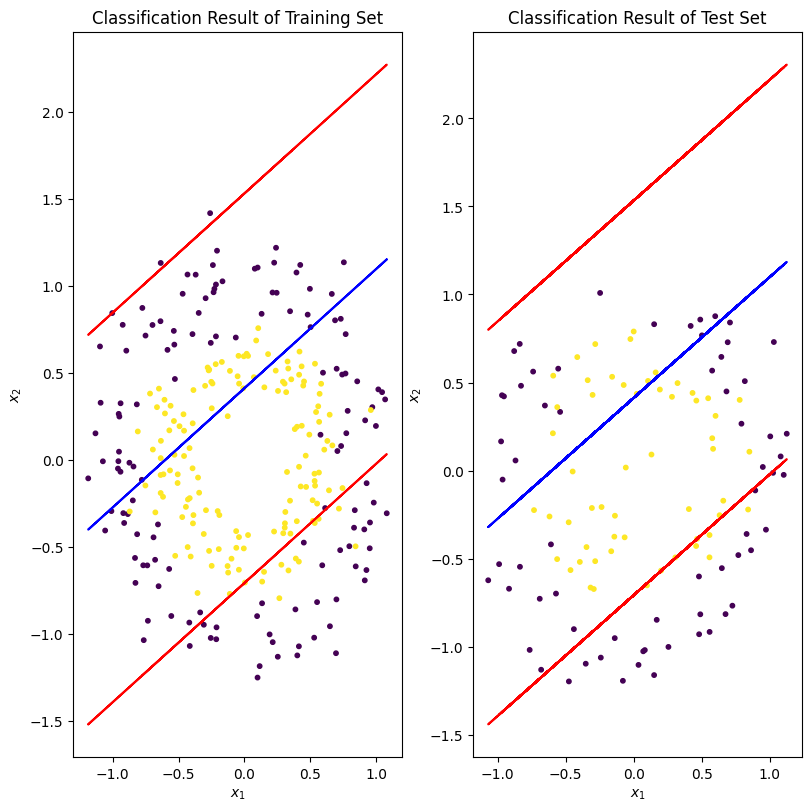

In [ ]:
run_step_2('3', no_print=True, use_cvxpy=True, cvxpy_C=100)

### **Step 2-2 (10 pts)**. Implement SVM with RBF kernel

**Problem 4(a)** (**5+5 pts**) The below function is **run_step_3**, which is a function that performs SVM with **RBF kernel**, derives **accuracy and confusion matrix** of **training** and **test** set, **prints** them, and **plots** data points, decision boundary which is a curve. There are **four** different experiments with varying values in ascending order for one of **C** and **gamma**, while the other is fixed.

For **(1)**, derive **y_3_train_pred** and **y_3_test_pred** which are the label estimates with respect to **y_3_train** and **y_3_test**, respectively. Use **X_3_train** or **X_3_test** as input. <br>
Hint: You may refer to [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to find out what function to use. Make the prediction by the method you found. Then, use the **append** attribute.

For **(2)**, derive **acc_list_train**, **acc_list_test**, and **confusion_matrix_list**. Use **get_accuracy** and **make_confusion_matrix** function for implementation. You do not need to use **m** for the latter function here either. <br>
For **acc_list_train**, the **accuracy** result for the training set in each **i**-th run (count from **0**) should be at **i**-th index of **acc_list_train**. You can use **append** attribute provided for the **list** object. For **acc_list_test**, it is quite simple but for the test set. <br>
For **confusion_matrix_list**, it is a stacked big matrix of size **4 $\times$ 4** which consists of **eight** **2 $\times$ 2** matrices, where **four** are made by **training set** and the other **four** are made by **test set**. Specifically, the **above two rows** are for confusion matrices made by **training set**, and the **below two rows** are for confusion matrices made by **test set**. The **leftmost two columns** are for confusion matrices made by the experiment index **i=0**, **next two columns** are for **i=1**, and so on.    

In [ ]:
def run_step_3(variable, lst, fixed):
    acc_list_train = []
    acc_list_test = []
    confusion_matrix_list = np.zeros((4, 8))
    plt.figure(figsize=(10, 10), constrained_layout=True)

    for i in range(4):
        if variable == 'C':
            C = lst[i]
            gamma = fixed
        elif variable == 'gamma':
            C = fixed
            gamma = lst[i]

        clf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=7, tol=1e-5)
        clf.fit(X_3_train, y_3_train)

        ########## implement here (1) ##########
        y_3_train_pred = clf.predict(X_3_train)
        y_3_test_pred = clf.predict(X_3_test)
        ####################################

        ########## implement here (2) ##########
        acc_list_train.append(get_accuracy(y_3_train, y_3_train_pred))
        acc_list_test.append(get_accuracy(y_3_test, y_3_test_pred))

        train_confusion = make_confusion_matrix(y_3_train, y_3_train_pred)
        test_confusion = make_confusion_matrix(y_3_test, y_3_test_pred)

        confusion_matrix_list[0][i] = train_confusion[0][0]
        confusion_matrix_list[0][i+1] = train_confusion[0][1]
        confusion_matrix_list[1][i] = train_confusion[1][0]
        confusion_matrix_list[1][i+1] = train_confusion[1][1]

        confusion_matrix_list[2][i] = test_confusion[0][0]
        confusion_matrix_list[2][i+1] = test_confusion[0][1]
        confusion_matrix_list[3][i] = test_confusion[1][0]
        confusion_matrix_list[3][i+1] = test_confusion[1][1]
        ########################################

        # Subplot size 4X2: left-training set, right-test set, contour plot to display decision boundary
        plt.subplot(4, 2, 2*i + 1)
        ax = plt.gca()
        X_grid_train = np.linspace(np.min(X_3_train[:, 0]), np.max(X_3_train[:, 0]), 1000)
        Y_grid_train = np.linspace(np.min(X_3_train[:, 1]), np.max(X_3_train[:, 1]), 1000)
        X_mesh_train, Y_mesh_train = np.meshgrid(X_grid_train, Y_grid_train)
        Z = clf.predict(np.c_[X_mesh_train.ravel(), Y_mesh_train.ravel()]).reshape(1000, 1000)
        ax.contour(X_mesh_train, Y_mesh_train, Z)
        plt.scatter(X_3_train[:, 0], X_3_train[:, 1], c=y_3_train, s=10)
        plt.title('Classification result of training set, C=' + str(C) + ', $\gamma$=' + str(gamma))

        plt.subplot(4, 2, 2*i + 2)
        ax = plt.gca()
        X_grid_test = np.linspace(np.min(X_3_test[:, 0]), np.max(X_3_test[:, 0]), 1000)
        Y_grid_test = np.linspace(np.min(X_3_test[:, 1]), np.max(X_3_test[:, 1]), 1000)
        X_mesh_test, Y_mesh_test = np.meshgrid(X_grid_test, Y_grid_test)
        Z = clf.predict(np.c_[X_mesh_test.ravel(), Y_mesh_test.ravel()]).reshape(1000, 1000)
        ax.contour(X_mesh_test, Y_mesh_test, Z)
        plt.scatter(X_3_test[:, 0], X_3_test[:, 1], c=y_3_test, s=10)
        plt.title('Classification result of test set, C=' + str(C) + ', $\gamma$=' + str(gamma))


    print('A list of accuracy of SVM for the training set is:')
    print(', '.join(f'{x:.2f} %' for x in acc_list_train))
    print('A list of accuracy of SVM for the test set is:')
    print(', '.join(f'{x:.2f} %' for x in acc_list_test))
    print("Confusion matrices of SVM for training and test sets are:")
    print(confusion_matrix_list.astype(int))

    plt.show()


### **Step 2-3 (4 pts)**. Apply SVM with RBF kernel with **varying C values** to **Dataset 3**

First, we fix **gamma** to **0.2** and change the **C** values within **0.2, 10, 100, and 10^11**.


A list of accuracy of SVM for the training set is:
68.93 %, 92.86 %, 93.21 %, 93.57 %
A list of accuracy of SVM for the test set is:
60.83 %, 92.50 %, 90.00 %, 82.50 %
Confusion matrices of SVM for training and test sets are:
[[ 48 121 124 126   9   0   0   0]
 [  0   6   8   9 136   0   0   0]
 [ 18  61  61  54  11   0   0   0]
 [  0   5   8  10  45   0   0   0]]


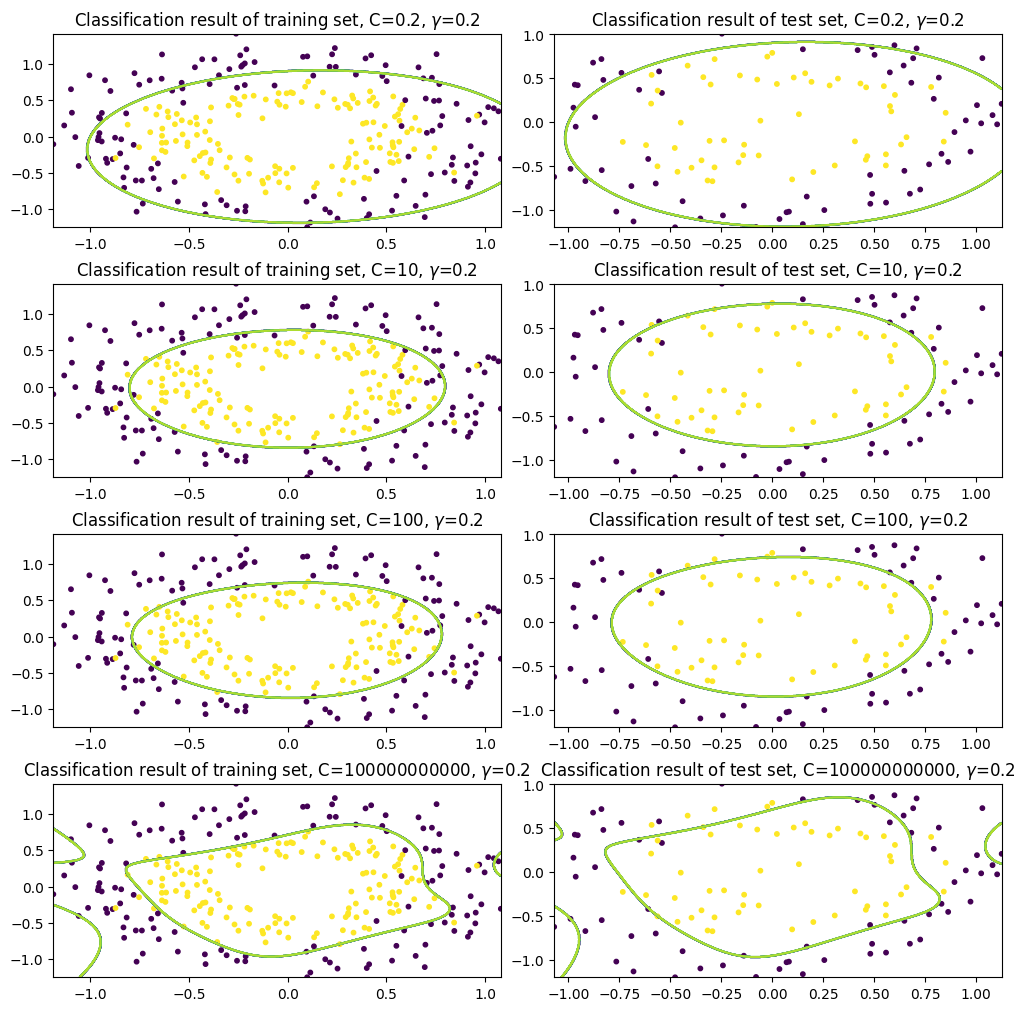

In [ ]:
run_step_3(variable='C', lst=[0.2, 10, 100, int(1e11)], fixed=0.2)

*********************************
**Problem 4(b)** (**2+2 pts**) Answer the following questions.
1. Compare the results in **Step 2-1** and here when **C=10 or 100** with the shape of the decision boundary.
2. What happens if **C** is too small? How about if **C** is too large? You have to mention the results which can be seen by **plots**.

---------- your answer ---------- <br>
1. 2-1의 boundary는 linear인 반면 이번 boundary는 원형으로 non-linear boundary가 나타났다. non linear boundary에 대해 accuracy 수치상으로도 더 높은 값을 얻었다. data의 분포를 보면 non-linear boundary가 linear boundary보다 더 합리적인 경계임을 알 수 있다.

2. C가 너무 작은 경우 margin을 크게 허용해 training data에 대해 덜 의존적이고 새로운 data 분포에 대해서도 잘 분류할 수 있다. 반대로 C가 큰 경우 margin이 작기 때문에 training dataset에 대해 정확하게 분류해낸다. 즉 training dataset에 대해 tight boundary이므로 overfitting일 발생해 test dataset에 대해서 오류가 생길 확률이 높다.


------------------------------------------ \
*********************************

### **Step 2-4 (6 pts)**. Apply SVM with RBF kernel with **varying gamma values** to **Dataset 3**

First, we fix **C** to **50** and change the **gamma** values within **0.0015, 0.1, 10, and 1000**.

A list of accuracy of SVM for the training set is:
62.14 %, 93.21 %, 97.50 %, 100.00 %
A list of accuracy of SVM for the test set is:
51.67 %, 92.50 %, 89.17 %, 80.00 %
Confusion matrices of SVM for training and test sets are:
[[ 29 121 131 135   0   0   0   0]
 [  0   5   3   0 145   0   0   0]
 [  7  61  63  60   5   0   0   0]
 [  0   5  11  19  36   0   0   0]]


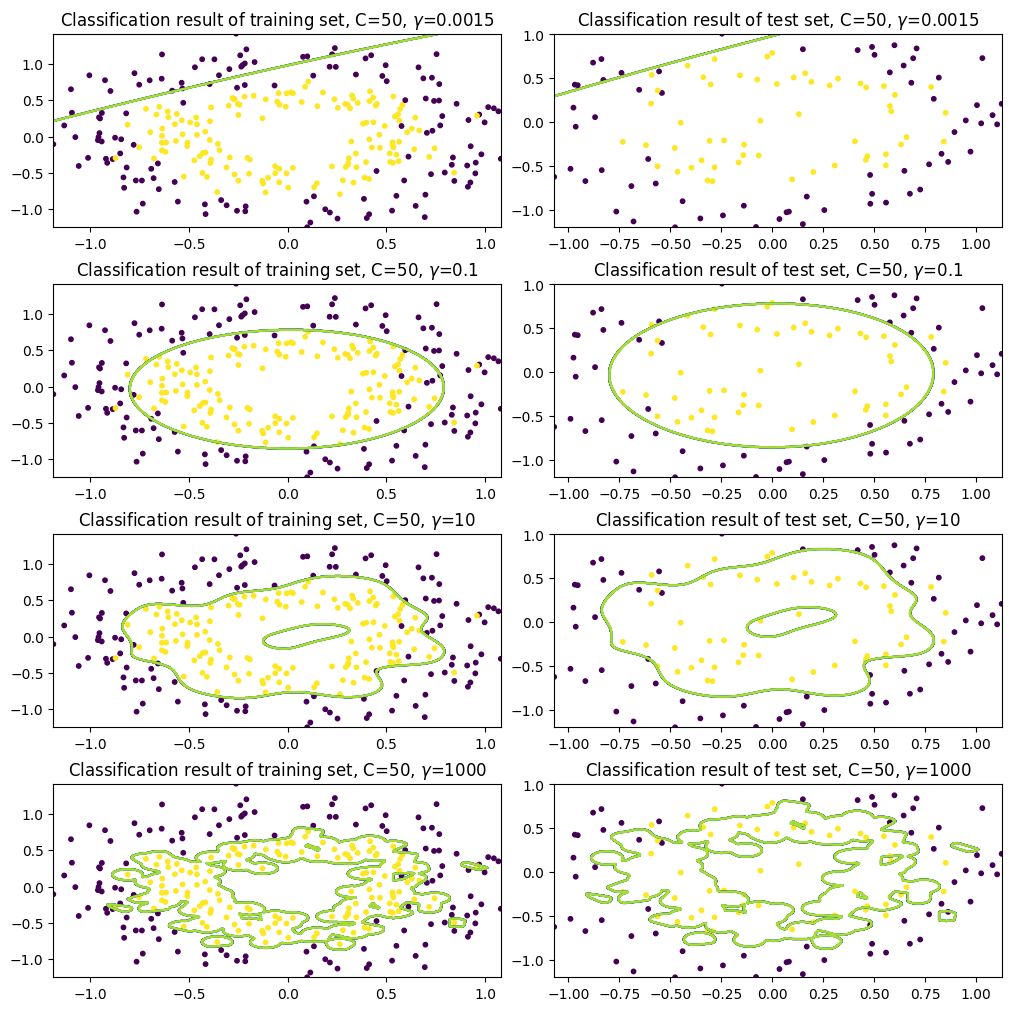

In [ ]:
run_step_3(variable='gamma', lst=[0.0015, 0.1, 10, 1000], fixed=50)

*********************************
**Problem 4(c)** (**2+2+2 pts**) Answer the following questions.
1. What happens if **gamma** is too small? How about if **gamma** is too large? You have to mention the results which can be seen by **plots**.
2. If you answered **1** correctly, then you know what happens if **gamma** is too small. Why do you think such a phenomenon happens? There is **no** deduction even if you answered **wrong** unless the answer is **insincere**.
3. For **SVM** with **RBF kernel**, which of the hyperparameters **C** and **gamma** affects the results more than the other? Justify your answer by comparing the results from **Step 2-3** and here.

---------- your answer ---------- <br>
1. gamma가 너무 작은 경우 boundary의 complexity가 낮아 제대로 된 분류가 되지 못한다. 반대로 gamma가 큰 경우 training dataset에 대해서는 보라색 점들 사이에 있는 노란색 점들까지 분류할 정도로 정확한 결과가 나오지만 traing dataset에 대해서만 정확한 boundary이므로 overfitting이 발생해 test dataset에 대해서 오차가 생길 확률이 높아진다.
2. Step 2-2에 주어진 링크를 통해 gamma에 대한 정보를 확인하면 거리에 대한 weight임을 알 수 있다. 거리 별로 weight을 다르게 해서 복잡한 boundary를 유도해 낼 수 있지만 이 weight가 작으면 거리 큰 차이가 생기지 않게 된다. 즉, underfitting이 발생하고 boundary가 data 분포에 비해 단순한 형태로 나오게 된다.
3. gamma가 결과에 더 큰 영향을 준다. Step 2-3에서 C가 10^11인 경우와 Step 2-4에서 gamma가 1000인 두 그래프를 비교해보면 차이를 확인할 수 있다. gamma가 1000으로 10^11인 C보다 훨씬 작은 값임에도 그래프가 더 복잡한 형태를 나타내고 있으므로 gamma가 결과에 더 큰 영향을 준다고 볼 수 있다.


------------------------------------------ \
*********************************

# **Part 4 (Optional; total 20 Bonus pts)** **Multiclass** classification with **MNIST** dataset
* Apply SVM with RBF kernel introduced in **Part 3** to more complex **multiclass** cases; **MNIST** dataset
* Find the best **hyperparameters** for training

## **Step 1**. Basics of MNIST dataset

## **$\color{red}{\text{ToDo}}$**: First Run codes in **Step 1-1**, especially with **changing** the **index** values of the last code to observe various handwritten number datasets. You may use the **full** dataset by uncommenting the commented code lines by erasing the sharp (#) symbol and then inserting # in front of each corresponding line. If so, you should mention that you used the full dataset and do not forget to change the range of gamma values, or the code execution would take several hours or more (If you use **full** dataset, you may spend about **3 hrs** in **Step 2-1** in Google Colab. Without gamma changes, you may spend **much more**).

### **A brief explanation of multiclass SVM and MNIST dataset**
Although the SVM classifier itself is intrinsically designed for **binary** classification, we can also use SVM for **multiclass** classification by using an **ensemble** of different classifiers. There are two prominent methods; **OVR** (one-versus-rest) and **OVO** (one-versus-one). <br>
**OVR** performs SVM with respect to each class versus the other, i.e. +1 for a certain class and -1 for the other. For classification, we calculate the decision function for all classes and **choose the one with +1**. We can calculate with respect to all decision functions and choose the label with the **largest decision function value**, or we may **halt** when the decision function is nonnegative and choose such a label. The prior is **with** **tie-break** and the latter is **without** **tie-break**. The prior is more accurate but not much for our case and **takes significantly more computation power**, so we will not use it. <br>
**OVO** performs SVM with respect to all possible pairs of labels and uses **majority vote** scheme. <br>
**OVR** is relatively simple and computationally efficient but because the classification is one versus rest, the **imbalance** issue occurs. However, the computational efficiency is crucial and does not impact the performance much, we use **OVR without tie-break**.
**MNIST** dataset is one of the most frequently used toy datasets for machine learning. It consists of **70000** 28 $\times$ 28 resolution handwritten digits from 0 to 9. First 60000 images are used for training and the others are used for tests. The training set was written by high school students and the test set was written by public officials. We consider each image as a 28 $\times$ 28=784-dimensional vector by reshaping because SVM only supports vectors as feature input.  

### **Step 1-1**. Import **MNIST** dataset, and visualize
First, import **MNIST** dataset with the **first code**. Note that imported data has **pandas.DataFrame** and **pandas.Series** type which we do not use in this **project**, thus we convert them to **numpy arrays**. <br>
Second, we define the function that shows the **index** (what number it is) and the visualization of an image by the second code. We call the function on the third code. We recommend to **change** the indices to see various images. The range is **0~59999** for **training set** and **60000~69999** for **test set** as explained above.

In [ ]:
# Import MNIST dataset and convert to np.ndarry
X, y = fetch_openml('mnist_784', version=1, parser='liac-arff', return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
# Define the function that shows the image of handwritten numbers
def visualize_number(n):
    plt.imshow(X[n, :].reshape(28, 28), cmap='gray')
    plt.title('This Image is number {num}'.format(num=y[n]))
    plt.show()

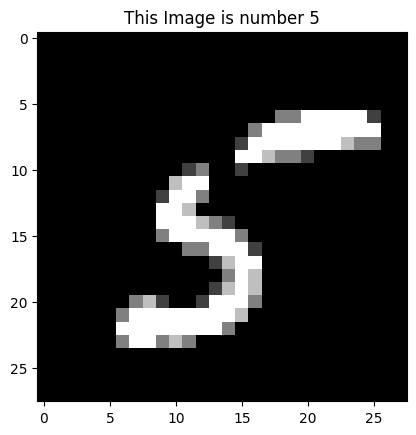

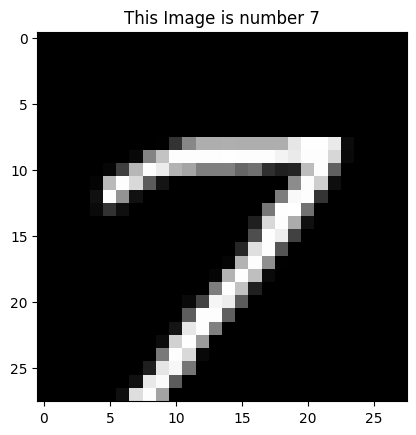

In [ ]:
visualize_number(47)
visualize_number(66666)

### **Step 1-2**. Training-test set **division** and **preprocessing**
Although there are **60000** training data and **10000** test data, it takes too much time to apply; thus we use only **10000** training data and **2000** test data. You may use **full data** if you want with **commented** codes (**1~2 hrs** for **Step 2-1**). As explained above, we have to perform **preprocessing** to apply SVM, and applying **StandardScaler** and then applying **Normailzier** turns out to be a relatively simple and powerful **preprocessing** technique. <br>
**StandardScaler** makes each feature dimension **mean 0** and **standard deviation 1** with respect to **training set**, and **Normalizer** makes each data **norm 1**.

In [ ]:
# Option 1. Partial data set

X_train = X[:10000]
y_train = y[:10000]
X_test = X[60000:62000]
y_test = y[60000:62000]

# Option 2. Full data set; if you want to use this, uncomment and comment Option 1

#X_train = X[:60000]
#y_train = y[:60000]
#X_test = X[60000:]
#y_test = y[60000:]

# Preprocessing

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

norm = Normalizer()
X_train = norm.transform(X_train)
X_test = norm.transform(scaler.transform(X_test))

## **Step 2 (Total 20 pts)**. Apply SVM with RBF kernel, **multiclass** to **MNIST** dataset

## **$\color{red}{\text{ToDo}}$**: Fill in the blanks in **Steps 2-1 & 2-2**. Then run the code in **Step 2-1** and then **Step 2-2**. Note that there is a blank in **Step 2-2** that you can fill in only if you run the code in **Step 2-1**. Write your answer to all questions in markdown blocks at the end of **Steps 2-1 & 2-2.**

### **Step 2-1 (6+4 pts)**. Apply SVM with RBF kernel, **multiclass** to **MNIST** dataset and find the best **hyperparameter**

**Problem 5(a)** (**6 pts**) For implementation, it is really similar to that of **(1)** and the **first** half of **(2)** of **Step 2-2** of **Part 3**. The main difference is that for this time, you just plug in **[i][j]** indices instead of using **append** attribute. Input **X_train** and **X_test**, then output two **2D arrays**, **acc_train** and **acc_test**, whose **[i][j]** indices coincide to the for loops.

In [ ]:
acc_train = np.zeros((2, 3))
acc_test = np.zeros((2, 3))
C_list = [1, 100]

# If you use the full data, please comment
gamma_list = [0.1, 1, 10]

# If you use the full data, please uncomment this
#gamma_list = [0.01, 0.1, 1]
for i in range(2):
    for j in range(3):
        clf = SVC(kernel='rbf', C=C_list[i], gamma=gamma_list[j], random_state=12, tol=1e-3, decision_function_shape='ovr')
        clf.fit(X_train, y_train)

        ########## implement here ##########
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        acc_train[i][j] = get_accuracy(y_train, y_train_pred)
        acc_test[i][j] = get_accuracy(y_test, y_test_pred)
        ####################################

print("Accuracy of SVM for training set is:")
print(', '.join(f'{x:.2f}%' for x in acc_train[0]))
print(', '.join(f'{x:.2f}%' for x in acc_train[1]))
print("Accuracy of SVM for test set is:")
print(', '.join(f'{x:.2f}%' for x in acc_test[0]))
print(', '.join(f'{x:.2f}%' for x in acc_test[1]))

Accuracy of SVM for training set is:
93.76%, 99.11%, 100.00%
99.97%, 100.00%, 100.00%
Accuracy of SVM for test set is:
89.75%, 93.85%, 48.35%
92.00%, 94.75%, 51.60%


*********************************
**Problem 5(b)** (**1+2+1 pts**)
1. What type of dataset between **partial (default)** or **full** did you use?
2. What **C** and **gamma** pair had the best performance?
3. What was the **training** and **test** set performance of such case? <br>
   
---------- your answer ---------- <br>
1. partial dataset
2. (C, gamma) = (100, 1)이 training set 뿐만 아니라 test set에 대해서도 높은 accuracy를 나타낸다.
3. 이 때의 training set accuracy는 100%, test set accuracy는 94.75%이다.
------------------------------------------ \
*********************************

### **Step 2-2 (4+6 pts)**. Apply SVM with RBF kernel, **multiclass** to **MNIST** dataset with **best** hyperparameter and derive the **confusion matrix** for **test set**

**Problem 5(c)** (**4 pts**) For implementation, first you fill in the values for **C** and **gamma** such that you found as the best and wrote in the **markdown** of the last step. The remaining part is really similar to that of **(1)** and the **second** half of **(2)** of **Step 2-2** of **Part 3**. The main difference is that for this time, you only have to perform it for **test set only**. Input **X_test** and output **M_test**.


In [ ]:
# Fill the C and gamma values that had the highest accuracy above
clf = SVC(kernel='rbf', C= 100, gamma= 1, random_state=12, tol=1e-3, decision_function_shape='ovr') # Fill C and gamma values
clf.fit(X_train, y_train)

########## implement here ##########
y_test_pred = clf.predict(X_test)
M_test = make_confusion_matrix(y_test, y_test_pred, m=10)
####################################

print('Confusion matrices of SVM for the test set is:')
print(M_test)

Confusion matrices of SVM for the test set is:
[[173   0   0   0   0   0   2   0   0   0]
 [  0 232   0   0   0   0   2   0   0   0]
 [  2   0 206   0   2   0   2   3   3   1]
 [  0   0   1 198   0   1   0   5   1   1]
 [  0   0   2   0 206   0   4   0   1   4]
 [  1   0   1   2   0 170   2   0   2   1]
 [  2   1   3   0   0   3 167   0   2   0]
 [  0   2   6   1   0   0   0 189   0   7]
 [  1   0   4   4   3   2   1   2 175   0]
 [  0   0   0   3   4   1   0   3   4 179]]


*********************************
**Problem 5(d)** (**3+3 pts**) What are the two most frequent misclassifications according to the **confusion matrix**? Your answer should have the form **exact: n1 / predicted: n2**. You can find how to read the **confusion matrix** at **Step 1-1** of **Part 2**. If two misclassifications have the **same highest** number, you should write **that two only**.

---------- your answer ---------- <br>
exact: 7 / predicted: 9


------------------------------------------ \
*********************************